### Importing Datasets

In [97]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

#### Data Loading

In [98]:
datapath = r"C:\Users\USER\3d-printing-model\dataset\dataset.csv"
DataFrame= pd.read_csv(datapath)

In [99]:
print("DataFrame loaded successfully.")
DataFrame=pd.DataFrame(DataFrame)
DataFrame

DataFrame loaded successfully.


,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8.0,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7.0,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1.0,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4.0,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6.0,90,grid,250,80,40,abs,100,92,5,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.06,9.0,10,honeycomb,200,75,80,abs,75,200,9,0.9
62,0.04,2.0,80,grid,230,70,40,abs,50,40,12,0.8
63,0.02,4.5,70,honeycomb,240,85,40,abs,75,68,10,0.8
64,0.05,6.0,10,honeycomb,245,75,85,abs,75,205,5,0.5


#### Data Pre-Preprocessing

In [100]:
#printing the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
DataFrame.head()



First 5 rows of the DataFrame:


,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8.0,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7.0,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1.0,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4.0,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6.0,90,grid,250,80,40,abs,100,92,5,0.7


In [101]:
#printing the last 5 rows of the DataFrame
print("Last 5 rows of the DataFrame:")
DataFrame.tail()

Last 5 rows of the DataFrame:


,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
61,0.06,9.0,10,honeycomb,200,75,80,abs,75,200,9,0.9
62,0.04,2.0,80,grid,230,70,40,abs,50,40,12,0.8
63,0.02,4.5,70,honeycomb,240,85,40,abs,75,68,10,0.8
64,0.05,6.0,10,honeycomb,245,75,85,abs,75,205,5,0.5
65,0.15,1.0,50,grid,220,60,120,abs,0,120,16,1.5


In [102]:
#Shape of the DataFrame
print(f"The shape of the DataFrame is: {DataFrame.shape[1]} columns")
print(f"The shape of the DataFrame is: {DataFrame.shape[0]} rows")

The shape of the DataFrame is: 12 columns
The shape of the DataFrame is: 66 rows


In [103]:
#checking the info of the DataFrame
print("="*80)
print("DATAFRAME STRUCTURE OVERVIEW".center(80))
print("="*80)
info_str = DataFrame.info()
print(info_str)


                          DATAFRAME STRUCTURE OVERVIEW                          
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        66 non-null     float64
 1   wall_thickness      66 non-null     float64
 2   infill_density      66 non-null     int64  
 3   infill_pattern      66 non-null     object 
 4   nozzle_temperature  66 non-null     int64  
 5   bed_temperature     66 non-null     int64  
 6   print_speed         66 non-null     int64  
 7   material            66 non-null     object 
 8   fan_speed           66 non-null     int64  
 9   roughness           66 non-null     int64  
 10  tension_strenght    66 non-null     int64  
 11  elongation          66 non-null     float64
dtypes: float64(3), int64(7), object(2)
memory usage: 6.3+ KB
None


In [104]:

print("STATISTICAL SUMMARY OF THE DATAFRAME")

summary = DataFrame.describe()
summary

STATISTICAL SUMMARY OF THE DATAFRAME


,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.098182,5.583333,54.727273,222.272727,70.378788,64.242424,48.530303,160.545455,19.757576,1.625000
std,0.062608,2.952943,27.545512,15.094110,8.651839,28.598580,35.834328,95.703899,9.202108,0.762498
min,0.020000,1.000000,10.000000,200.000000,60.000000,40.000000,0.000000,21.000000,4.000000,0.400000
25%,0.052500,3.000000,40.000000,210.000000,65.000000,40.000000,25.000000,78.250000,12.000000,1.025000
50%,0.100000,6.000000,50.000000,220.000000,70.000000,60.000000,50.000000,149.500000,18.500000,1.500000
75%,0.150000,8.000000,80.000000,230.000000,75.000000,60.000000,75.000000,220.000000,27.000000,2.175000
max,0.200000,12.000000,100.000000,250.000000,100.000000,120.000000,100.000000,368.000000,38.000000,3.300000


##### Data cleaning

In [105]:
## checking duplicate values
print("="*50)
print("DUPLICATE VALUES CHECK".center(50))
print("="*50)
duplicate_count = DataFrame.duplicated().sum()
print(f"Number of duplicate rows in the DataFrame: {duplicate_count}")

              DUPLICATE VALUES CHECK              
Number of duplicate rows in the DataFrame: 0


In [106]:
# checking null values in the DataFrame
null_values = DataFrame.isnull().sum()
print("="*50)
print("Null values in each column".center(50))
print("="*50)
print(null_values)

            Null values in each column            
layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64


In [107]:
## unique values in each column
print("="*100)
print("Unique values in each column".center(90))
print("="*100)
for col in DataFrame.columns:
    print(f" {col} : {set(DataFrame[col])}")


                               Unique values in each column                               
 layer_height : {0.1, 0.06, 0.09, 0.15, 0.2, 0.03, 0.05, 0.04, 0.02}
 wall_thickness : {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 4.5, 12.0}
 infill_density : {100, 70, 40, 10, 12, 80, 50, 20, 85, 90, 60, 30, 95}
 infill_pattern : {'grid', 'honeycomb'}
 nozzle_temperature : {225, 230, 200, 205, 240, 210, 245, 215, 250, 220}
 bed_temperature : {65, 100, 70, 75, 80, 85, 60, 95}
 print_speed : {65, 70, 40, 80, 85, 120, 60}
 material : {'abs', 'pla'}
 fan_speed : {0, 100, 75, 50, 25, 28}
 roughness : {128, 265, 138, 144, 145, 276, 21, 278, 24, 25, 154, 30, 32, 289, 163, 40, 168, 298, 172, 176, 180, 55, 312, 60, 192, 321, 68, 326, 200, 74, 75, 205, 212, 88, 220, 92, 225, 98, 357, 360, 368, 244, 118, 120, 121, 126}
 tension_strenght : {4, 5, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 37, 38}
 elongation : {0.8, 1.2, 0.7, 1.4, 0.5, 1.1, 0.95, 1.5, 

In [108]:
##seperating categorical and numerical columns
categorical_cols = DataFrame.select_dtypes(include=['object']).columns
numerical_cols = DataFrame.select_dtypes(include=['number']).columns

print("Categorical columns:", list(categorical_cols))
print("Numerical columns:", list(numerical_cols))

Categorical columns: ['infill_pattern', 'material']
Numerical columns: ['layer_height', 'wall_thickness', 'infill_density', 'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed', 'roughness', 'tension_strenght', 'elongation']


In [109]:
## printing the numerical columns
for col in DataFrame.columns:
    print(f"{col}: {DataFrame[col].dtype}")

layer_height: float64
wall_thickness: float64
infill_density: int64
infill_pattern: object
nozzle_temperature: int64
bed_temperature: int64
print_speed: int64
material: object
fan_speed: int64
roughness: int64
tension_strenght: int64
elongation: float64


#### Exploratory Data analysis

#### univariate analysis

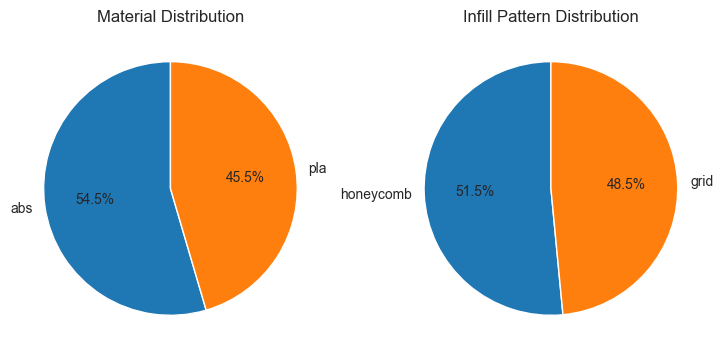

material
abs    36
pla    30
Name: count, dtype: int64

 infill_pattern
honeycomb    34
grid         32
Name: count, dtype: int64


In [110]:
#checking the count of values in material feature
fig, axes = plt.subplots(1, 2, figsize=(9, 8))
material_counts = DataFrame['material'].value_counts()
infill_values = DataFrame['infill_pattern'].value_counts()

axes[0].pie(material_counts, labels=material_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Material Distribution')
axes[1].pie(infill_values, labels=infill_values.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Infill Pattern Distribution')
plt.show()

print(DataFrame['material'].value_counts())
print('\n', DataFrame['infill_pattern'].value_counts())

In [111]:
skewness = DataFrame[numerical_cols].skew()  # Returns skew value for each column
print(skewness)

layer_height          0.298949
wall_thickness        0.114535
infill_density       -0.168731
nozzle_temperature    0.354103
bed_temperature       0.871932
print_speed           1.176907
fan_speed             0.010153
roughness             0.442716
tension_strenght      0.194075
elongation            0.521892
dtype: float64


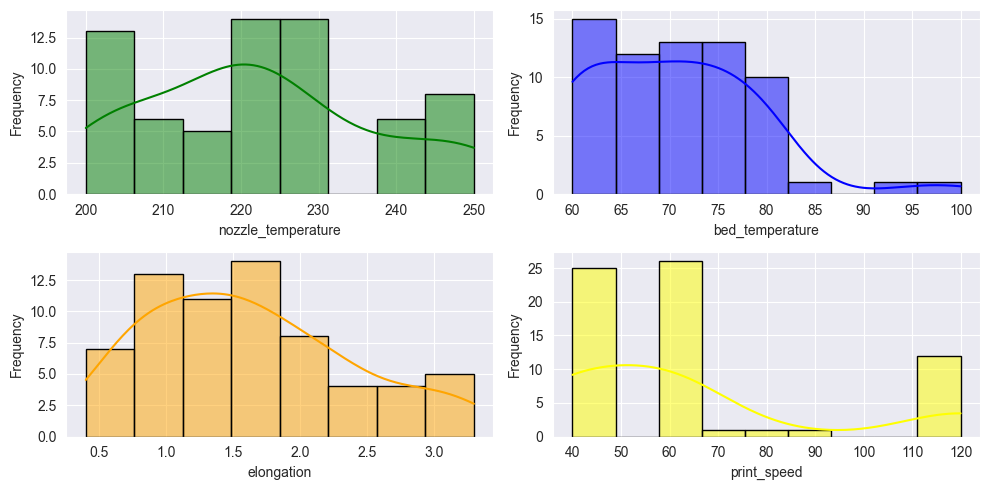

In [112]:
## distribution of different plots
fig, ax = plt.subplots(2, 2, figsize=(10,5))
sns.histplot(DataFrame['nozzle_temperature'], ax=ax[0,0], kde=True, color="green", edgecolor="black")
ax[0,0].set_ylabel('Frequency')

sns.histplot(DataFrame['bed_temperature'], ax=ax[0,1], kde=True, color="blue", edgecolor="black")
ax[0,1].set_ylabel('Frequency')
# Add skewness text to plot
sns.histplot(DataFrame['elongation'], ax=ax[1,0], kde=True, color="orange", edgecolor="black")
ax[1,0].set_ylabel('Frequency')

sns.histplot(DataFrame['print_speed'], ax=ax[1,1], kde=True, color="yellow", edgecolor="black")
ax[1,1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()



#### Multivariate analysis

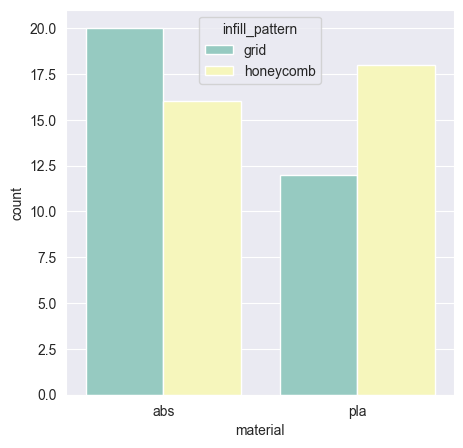

infill_pattern  grid  honeycomb
material                       
abs               20         16
pla               12         18


In [113]:
plt.figure(figsize=(5,5))
sns.countplot(data=DataFrame, x='material', hue='infill_pattern', palette='Set3')
plt.show()
#cross table for material and infill_pattern
cross_tab = pd.crosstab(DataFrame['material'], DataFrame['infill_pattern'])
print(cross_tab)


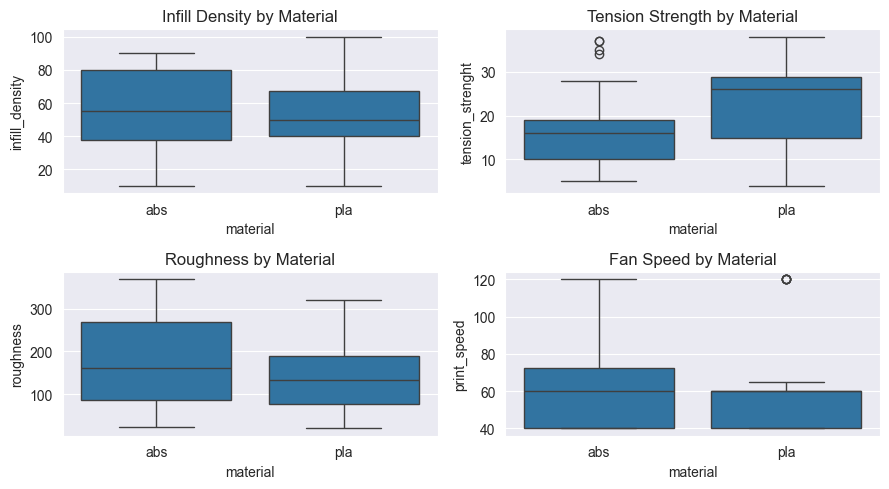

In [114]:

fig, axes = plt.subplots(2, 2, figsize=(9,5))
sns.boxplot(data=DataFrame, x='material', y='infill_density', ax=axes[0, 0])
axes[0, 0].set_title('Infill Density by Material')
sns.boxplot(data=DataFrame, x='material', y='tension_strenght', ax=axes[0, 1])
axes[0, 1].set_title('Tension Strength by Material')
sns.boxplot(data=DataFrame, x='material', y='roughness', ax=axes[1, 0])
axes[1, 0].set_title('Roughness by Material')
sns.boxplot(data=DataFrame, x='material', y='print_speed', ax=axes[1, 1])
axes[1, 1].set_title('Fan Speed by Material')
plt.tight_layout()
plt.show()


In [115]:
# Detect and cap outliers using IQR method to outlier removal
for col in numerical_cols:
    Q1 = DataFrame[col].quantile(0.25)
    Q3 = DataFrame[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    DataFrame[col] = np.where(DataFrame[col] < lower, lower, DataFrame[col])
    DataFrame[col] = np.where(DataFrame[col] > upper, upper, DataFrame[col])

    outlier_count = ((DataFrame[col] < lower) | (DataFrame[col] > upper)).sum()
    print(f"{col}: {outlier_count} outliers")


layer_height: 0 outliers
wall_thickness: 0 outliers
infill_density: 0 outliers
nozzle_temperature: 0 outliers
bed_temperature: 0 outliers
print_speed: 0 outliers
fan_speed: 0 outliers
roughness: 0 outliers
tension_strenght: 0 outliers
elongation: 0 outliers


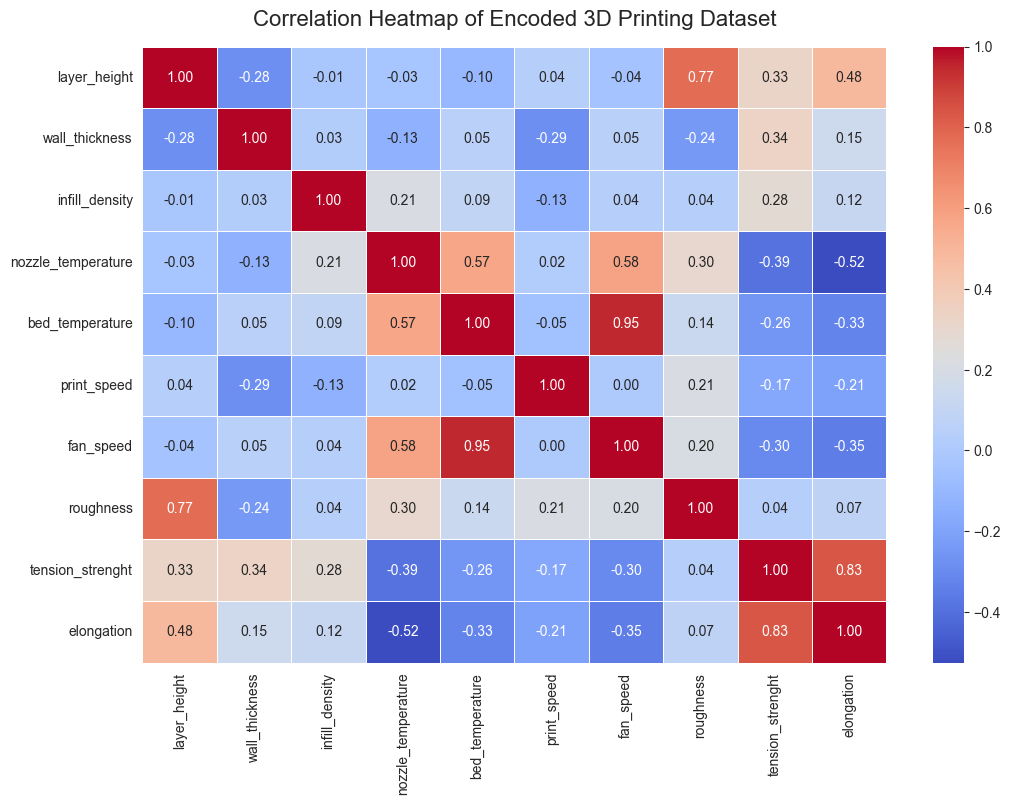

In [116]:
corr_matrix = DataFrame.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Encoded 3D Printing Dataset", fontsize=16, pad=15)
plt.show()

#### Data encoding

In [117]:
## one hot encoding is used but through pandas
df_encoded = pd.get_dummies(DataFrame, columns=['material', 'infill_pattern'], drop_first=True)

In [118]:
df_encoded.columns

Index(['layer_height', 'wall_thickness', 'infill_density',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed',
       'roughness', 'tension_strenght', 'elongation', 'material_pla',
       'infill_pattern_honeycomb'],
      dtype='object')

#### Data splitting

In [119]:

x = df_encoded.drop(['material_pla'], axis=1)
y = df_encoded['material_pla']

### Feature selection

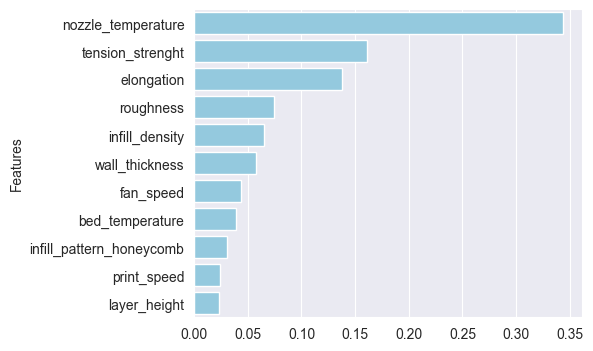

In [120]:
model = RandomForestClassifier()
model.fit(x, y)
imp = model.feature_importances_
title = x.columns
Top_features = pd.Series(imp,index=title).sort_values(ascending=False)

plt.figure(figsize=(5,4))
sns.barplot(x=Top_features.values, y=Top_features.index, color='skyblue')
plt.ylabel('Features')
plt.show()

In [121]:
# splitting data into test and train set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##### Data scaling

In [122]:
#Scaling of the data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Model Building and Evaluation

In [123]:

#Logistic regression
model_lg = LogisticRegression(max_iter=5000, random_state=42,solver='lbfgs')
model_lg.fit(x_train_scaled, y_train)
y_pred_lg= model_lg.predict(x_test_scaled)

#Logistic regression metrics
cv_scores = cross_val_score(model_lg, x, y, cv=5, scoring='accuracy')
print("--- Cross-Validation Performance ---")
print(f"Mean CV Accuracy: {cv_scores.mean()} (+/- {cv_scores.std()})\n")
print("--- Test Set Performance ---")
y_pred_test = model_lg.predict(x_test_scaled)
print("Train Accuracy: ",accuracy_score(y_train, model_lg.predict(x_train_scaled)))
print("Test Accuracy:",accuracy_score(y_test, y_pred_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

--- Cross-Validation Performance ---
Mean CV Accuracy: 0.8934065934065935 (+/- 0.038633836991751554)

--- Test Set Performance ---
Train Accuracy:  0.9423076923076923
Test Accuracy: 0.9285714285714286
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.89      0.94         9
        True       0.83      1.00      0.91         5

    accuracy                           0.93        14
   macro avg       0.92      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14

Confusion Matrix:
[[8 1]
 [0 5]]


In [124]:

rf_model = RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1,min_samples_split=4,min_samples_leaf=2,max_depth=4)
rf_model.fit(x_train_scaled, y_train)
cv_scores = cross_val_score(rf_model, x, y, cv=5, scoring='accuracy')

print("--- Cross-Validation Performance ---")
print(f"Mean CV Accuracy: {cv_scores.mean()} (+/- {cv_scores.std()})\n")
print("--- Test Set Performance ---")
y_pred_rf= rf_model.predict(x_test_scaled)
print("Train Accuracy: ",accuracy_score(y_train, rf_model.predict(x_train_scaled)))
print("Test Accuracy:",accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

--- Cross-Validation Performance ---
Mean CV Accuracy: 0.8923076923076924 (+/- 0.0923076923076923)

--- Test Set Performance ---
Train Accuracy:  1.0
Test Accuracy: 0.9285714285714286
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.89      0.94         9
        True       0.83      1.00      0.91         5

    accuracy                           0.93        14
   macro avg       0.92      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14

Confusion Matrix:
[[8 1]
 [0 5]]


In [125]:
dt_model = DecisionTreeClassifier(random_state=42,min_samples_leaf=2,min_samples_split=2)
dt_model.fit(x_train_scaled, y_train)

cv_scores = cross_val_score(dt_model, x, y, cv=5, scoring='accuracy')

## 3. Make Predictions for the Test Set
y_pred_dt = dt_model.predict(x_test_scaled)

print("--- Decision Tree Cross-Validation Performance ---")
print(f"Mean CV Accuracy: {cv_scores.mean()} (+/- {cv_scores.std()})\n")

print("--- Decision Tree Test Set Performance ---")
print("Train Accuracy: ", accuracy_score(y_train, dt_model.predict(x_train_scaled)))
print("Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

--- Decision Tree Cross-Validation Performance ---
Mean CV Accuracy: 0.8472527472527472 (+/- 0.10958198560279482)

--- Decision Tree Test Set Performance ---
Train Accuracy:  0.9423076923076923
Test Accuracy: 0.7857142857142857

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.78      0.82         9
        True       0.67      0.80      0.73         5

    accuracy                           0.79        14
   macro avg       0.77      0.79      0.78        14
weighted avg       0.80      0.79      0.79        14

Confusion Matrix:
[[7 2]
 [1 4]]


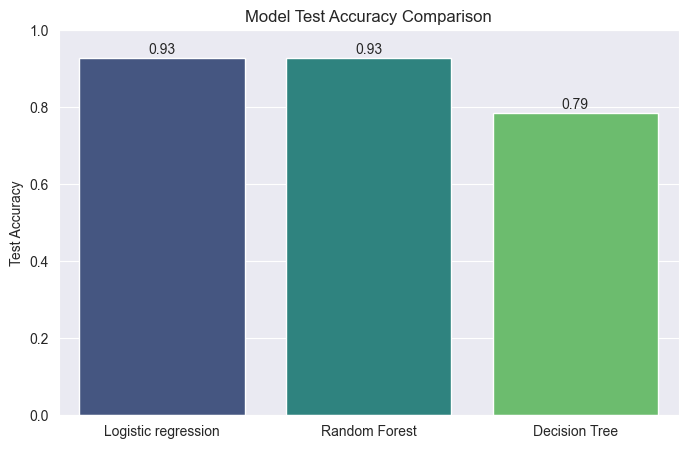

In [126]:
#model comparision

model_accuracies= {"Logistic regression":accuracy_score(y_test, y_pred_lg),
                   "Random Forest":accuracy_score(y_test, y_pred_rf),
                   "Decision Tree":accuracy_score(y_test, y_pred_dt)}

plt.figure(figsize=(8,5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylabel("Test Accuracy")
plt.ylim(0, 1)
plt.title("Model Test Accuracy Comparison")
for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()

##### since the logistic regression have more accuracy it is selected and also performed cross validation for further testing and training with standard deviation 0.03 compared to random forest and mean cv accuracy 0.92

##### Learning curve

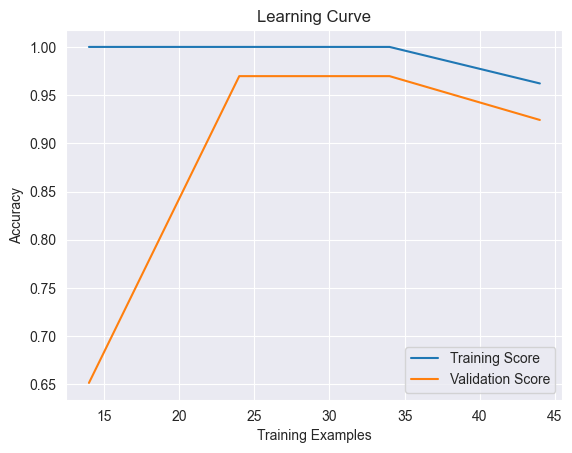

In [127]:
train_sizes, train_scores, test_scores = learning_curve(model_lg, x, y, cv=3)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')

plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Model saving

In [128]:
import joblib
joblib.dump(model_lg,r"..\flask\3d_printer.pkl")
joblib.dump(scaler,r"..\flask\min_max_scaler.pkl")

['..\\flask\\min_max_scaler.pkl']

In [129]:
df_encoded.to_csv('my_data.csv')

### Model testing


In [140]:
mixed_inputs = [ {'layer_height': 0.02, 'wall_thickness': 8, 'infill_density': 90, 'infill_pattern': 1, 'nozzle_temperature': 220, 'bed_temperature': 60, 'print_speed': 40, 'fan_speed': 0, 'roughness': 25, 'tension_strenght': 18, 'elongation': 1.2}, {'layer_height': 0.06, 'wall_thickness': 6, 'infill_density': 10, 'infill_pattern': 60, 'nozzle_temperature': 210, 'bed_temperature': 65, 'print_speed': 40, 'fan_speed': 55, 'roughness': 110, 'tension_strenght': 9, 'elongation': 0.8} ]

for row in mixed_inputs:
    row['infill_pattern_honeycomb'] = row.pop('infill_pattern')

input_df = pd.DataFrame(mixed_inputs)
expected_columns = x_train.columns
input_df = input_df[expected_columns]
scaled_features = scaler.transform(input_df)
predictions = model_lg.predict(scaled_features)
materials = ["PLA" if p == 1 else "ABS" for p in predictions]
result_df = input_df.copy()
result_df["Predicted Material"] = materials
# Show
print("The predicted material is:\n",result_df["Predicted Material"])


The predicted material is:
 0    ABS
1    PLA
Name: Predicted Material, dtype: object
